# ALGORITMOS DE BUSUQEDA 

## PREPARACION DE DATOS

### IMPORTAR LIBRERIAS

In [54]:
import networkx as nx #Libreria de redes
import matplotlib.pyplot as plt #libreira para graficar
import pandas as pd #libreria de manejo de datos
import scipy as sp #libreria python cientifico
import numpy as np #libreira manejo de matrices
import random #generador de elecciones aleatorias
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from community import community_louvain
import seaborn as sns
import markovchain

### Creacion DataFrame, red y Caracteristicas

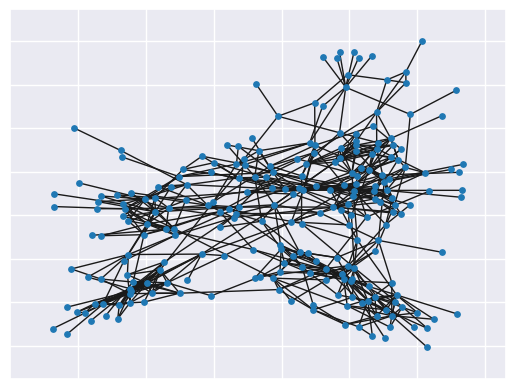

In [55]:
Redani=pd.read_csv("CN_spa.csv",header=None,sep=",") #importar dataframe, lista de enlaces
G = nx.from_pandas_edgelist(Redani,source=0,target=1) #Red
grafo=nx.draw_networkx(G,with_labels=False,node_size=15)#Dibujar la red
plt.show()

In [56]:
print("numero de nodos:",G.number_of_nodes(), "numero de enlaces:",G.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


In [57]:
#matriz de adyacencia
adyacencia=nx.adjacency_matrix(G).todense()
#dataframe de la matriz de adyacencia
DFadj=pd.DataFrame(adyacencia)
DFadj.to_csv('adjacencymatrix.csv')

### Creacion red auxiliar

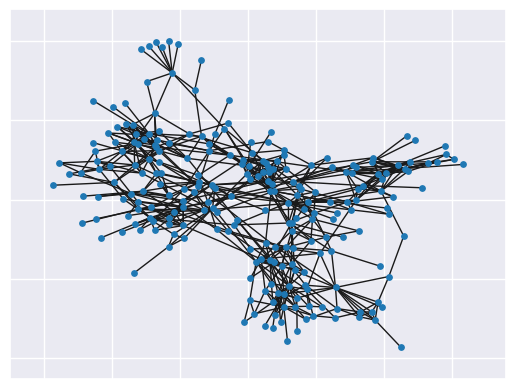

In [58]:
G1=nx.from_numpy_array(adyacencia)
grafo=nx.draw_networkx(G1,with_labels=False,node_size=15)

In [59]:
print("numero de nodos:",G1.number_of_nodes(), "numero de enlaces:",G1.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


#### Distribucion de grados de la red de numeros

In [60]:
degree=nx.degree(G1)
degree1=pd.DataFrame(degree)
#listdegree1=list(degree)
#degree2=pd.DataFrame(listdegree1, dtype = np.float64)
degree1

,0,1
0,0,8
1,1,3
2,2,14
3,3,2
4,4,10
...,...,...
231,231,12
232,232,1
233,233,7
234,234,4


#### Distribucion de grados de la red animal

In [61]:
degreeani=nx.degree(G)
degree1ani=pd.DataFrame(degreeani)
#listdegree1ani=list(degreeani)
#degree2ani=pd.DataFrame(listdegree1ani, dtype = np.float64)
degree1ani

,0,1
0,abeja,8
1,abejorro,3
2,aguila,14
3,aguilucho,2
4,arana,10
...,...,...
231,vaca,12
232,verderol,1
233,vibora,7
234,yegua,4


#### Grado medio

In [62]:
#Grado medio
meandegree=np.mean(degree1.iloc[:,1])
meandegree

5.177966101694915

In [63]:
meandegreeani=np.mean(degree1ani.iloc[:,1])
meandegreeani

5.177966101694915

#### frecuencias de cada grado

In [64]:
f=pd.value_counts(degree1.iloc[:,1])
f

1     38
4     32
2     28
3     24
6     22
5     19
7     17
8     14
9     11
10    10
14     9
12     5
11     4
13     2
15     1
Name: 1, dtype: int64

### Coeficiente de Clustering

In [65]:
coef_clustering=nx.average_clustering(G1)
coef_clustering

0.3296154175391464

#### Red graficada con clsuters

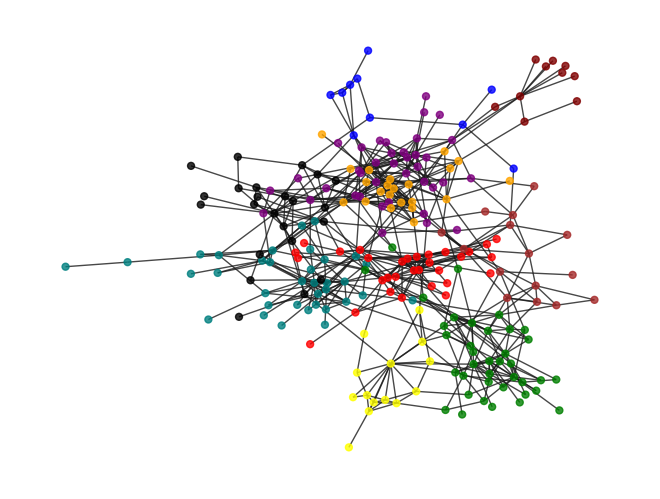

In [66]:
cluster=community_louvain.best_partition(G1)
unique_coms = np.unique(list(cluster.values()))
colors=['red', 'blue', 'green', 'yellow', 'orange', 'purple','black','maroon','teal','brown']
color_map = [colors[cluster[node]] for node in G1.nodes()]
nx.draw(G1, node_color=color_map, with_labels=False,node_size=25,alpha=0.8)


<Axes: >

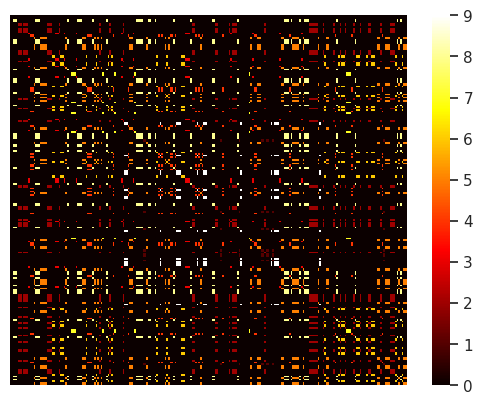

In [67]:
mascara = np.zeros_like(DFadj)
for i, cluster_i in cluster.items():
    for j, cluster_j in cluster.items():
        if cluster_i == cluster_j:
            mascara[i, j] = cluster_i

# Creamos el mapa de calor utilizando Seaborn
sns.set()
sns.heatmap(mascara, cmap='hot', cbar=True, xticklabels=False, yticklabels=False)

### camino mas corto promedio

In [68]:
caminomcort=nx.average_shortest_path_length(G1)
caminomcort

4.4232960692390915

Text(0.5, 1.0, 'Histograma de frecuencias de grado')

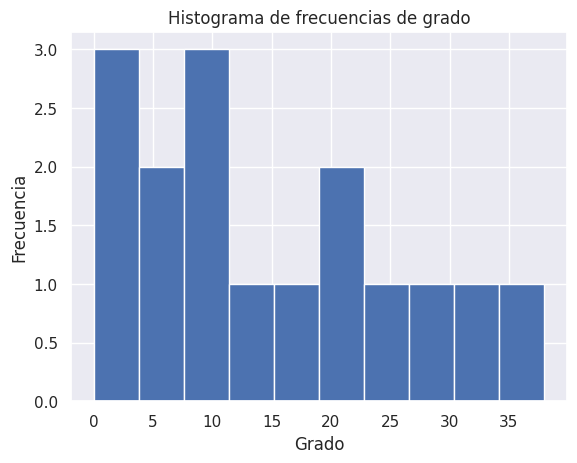

In [69]:
hist=nx.degree_histogram(G1)
plt.hist(hist)
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencias de grado')

La red tiene un camino mas corto promedio de 4.423, un coeficiente de clustering promedio de 0.329, del histograma anterior se puede ver que existen pocos nodos con alto grado, mientras que hay muchos con un grado bajo, esto deja a una red de tipo small-world. wattz-strogatz 1988.

## BUSQUEDA POR GRADO DE NODO

In [70]:
#funcion de busqueda
def walked_nodes_by_degree_prob(network,nodo):
    nodes = list(network.nodes())
    current_node = nodo
    walked_nodes = [current_node]
    while len(walked_nodes) < nx.number_of_nodes(G1): #nx.number_of_nodes(G1)
        neighbors = list(network.neighbors(current_node))
        neighbor_degrees = [network.degree(node) for node in neighbors]
        probabilities = [degree/sum(neighbor_degrees) for degree in neighbor_degrees]
        next_node = random.choices(neighbors, weights=probabilities)[0]
        walked_nodes.append(next_node)
        current_node = next_node
    return walked_nodes

In [71]:
nodo=0 #pasos en la red
i=0 #contador para matriz
matrix=[] #matriz de resultados
while i < nx.number_of_nodes(G1): #ciclo que crea la matriz nx.number_of_nodes(G1)
    while nodo < nx.number_of_nodes(G1): #ciclo que recorre la red nx.number_of_nodes(G1)+1
        pp=walked_nodes_by_degree_prob(G1,nodo)
        nodo+=1
        matrix.append(pp) #añade las listas a la matriz
        i+=1
newmatrix=np.delete(matrix,0,axis=1) #quita la primera columna
#arreglouni=np.ravel(newmatrix)#convierte la mattriz a un arreglo unidimension
#valores,frecuencia=np.unique(arreglouni,return_counts=True)#cal val,frec
#tabla=[valores,frecuencia]#tabula
#dataf=pd.DataFrame(tabla)#dataframe
matrixDF=pd.DataFrame(newmatrix)
matrixDF.to_csv("matrizF.csv")

In [72]:
unique_values, counts = np.unique(newmatrix, return_counts=True)
unique_values,counts

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [73]:
elementoi=unique_values
arreglo=list(G.nodes())
palabra=[]
for elemento in elementoi:
   palabra.append(arreglo[elemento])
#listapalabra=np.reshape(palabra,(1,-1))
frecuenciapalabra=[palabra,counts]
frecuenciapalabraDF=pd.DataFrame(frecuenciapalabra)
frecuenciapalabraDF


,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,abeja,abejorro,aguila,aguilucho,arana,arenque,atun,avispa,bacalao,barbo,...,tortuga,trucha,lucio,tucan,urogallo,vaca,verderol,vibora,yegua,zorro
1,448,67,995,35,587,12,740,365,87,241,...,79,1319,5,7,1,1105,11,245,167,126


Text(0, 0.5, 'Frecuencia')

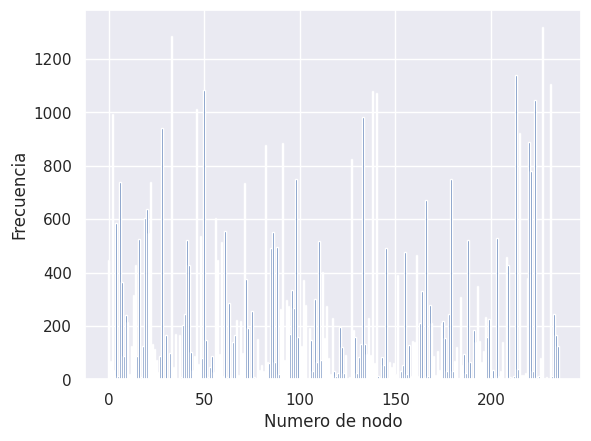

In [74]:
plt.bar(elementoi,counts)
plt.xlabel("Numero de nodo")
#plt.xticks(rotation=90)
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

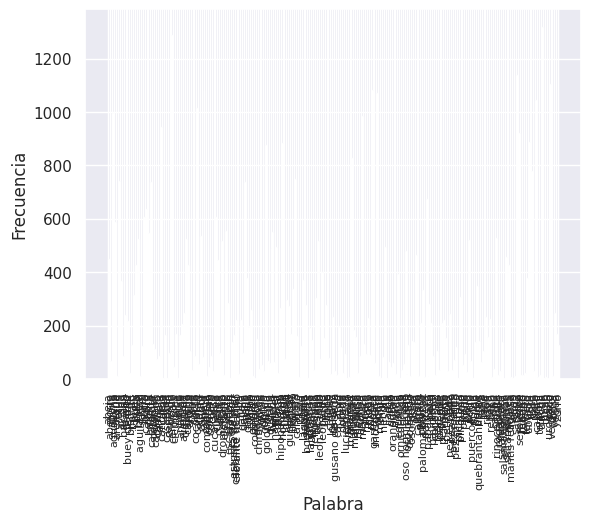

In [75]:
plt.bar(palabra,counts,width=0.5)
plt.xlabel("Palabra")
plt.xticks(rotation=90,fontsize=8)
plt.ylabel("Frecuencia")

Text(0, 0.5, 'frecuencia relativa')

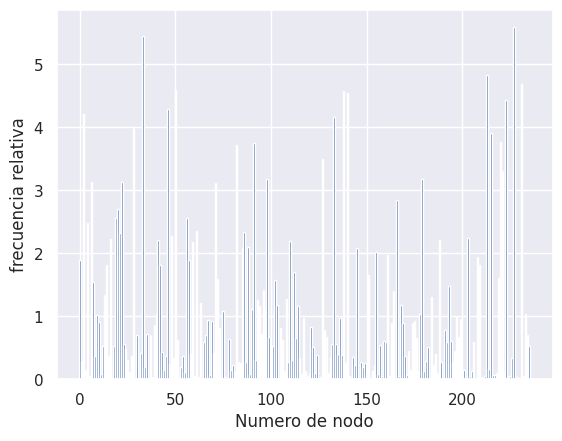

In [76]:
#frecuencia relativa
frecrelativa=counts/len(counts)
frec_relativa=pd.DataFrame(elementoi,frecrelativa)
plt.bar(elementoi,frecrelativa)
plt.xlabel('Numero de nodo')
plt.ylabel('frecuencia relativa')

In [96]:
similaridad=cosine_similarity(newmatrix)
limite=0.7
adyacencia1=np.zeros_like(similaridad)
for i in range(similaridad.shape[0]):
    for j in range(similaridad.shape[1]):
        if similaridad[i, j] >= limite:
            adyacencia1[i, j] = 1
Datanew=pd.DataFrame(adyacencia1)

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
232,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
233,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
234,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [113]:
Gn=nx.Graph(adyacencia)
Gn.remove_edges_from(nx.selfloop_edges(Gn))
newadyacencia=sp.sparse.csr_matrix(nx.adjacency_matrix(Gn)).todense()
DFnew=pd.DataFrame(newadyacencia)

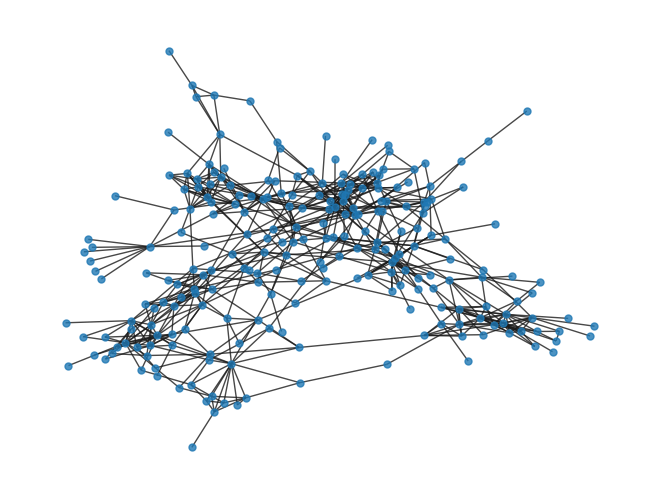

In [116]:
Gnew=nx.from_pandas_adjacency(DFnew)
nx.draw(Gnew,with_labels=False,node_size=25,alpha=0.8)

<Axes: >

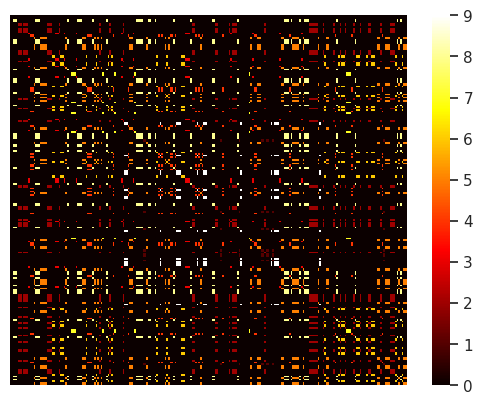

In [117]:
mascara1 = np.zeros_like(DFnew)
for i, cluster_i in cluster.items():
    for j, cluster_j in cluster.items():
        if cluster_i == cluster_j:
            mascara1[i, j] = cluster_i

# Creamos el mapa de calor utilizando Seaborn
sns.set()
sns.heatmap(mascara1, cmap='hot', cbar=True, xticklabels=False, yticklabels=False)

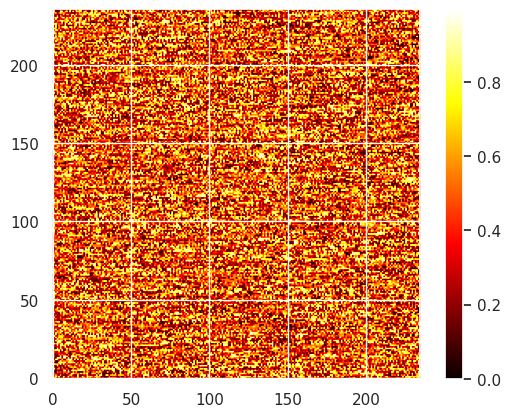

In [77]:
Mmatrix=pd.read_csv("matrizF.csv",header=None)
m1=Mmatrix.drop([0],axis=0) #elimina la columna de cabecera
m2=m1.drop([0],axis=1) #elimina la fila de cabecera
plt.imshow(m2/236,origin='lower',cmap='hot')
plt.colorbar()


In [78]:
pca=PCA(n_components=2)
datos_reducidos=pca.fit_transform(newmatrix)
k_means=KMeans(n_clusters=9,random_state=0).fit(datos_reducidos)
etiqueta=k_means.labels_
print(etiqueta)

[8 7 2 6 4 8 2 6 5 2 6 2 3 2 4 2 2 6 1 7 7 8 2 0 7 3 1 5 5 1 4 7 3 3 8 3 3
 2 0 8 2 0 2 8 7 7 2 6 8 7 2 2 3 8 2 4 0 5 8 1 4 2 4 1 2 3 0 1 5 0 0 7 8 8
 3 4 5 6 0 2 4 0 2 6 2 5 7 6 7 3 6 8 2 2 2 6 1 6 6 8 5 6 2 6 6 0 5 3 0 8 2
 8 6 3 1 3 0 6 7 6 7 7 4 0 7 1 2 8 8 4 5 1 4 8 7 8 7 4 2 7 2 4 2 4 1 8 1 2
 4 8 4 1 3 2 2 5 2 0 5 2 0 8 8 2 8 3 7 0 4 6 2 4 6 1 7 6 6 6 1 1 8 8 2 8 8
 6 7 4 7 2 2 1 0 6 7 4 8 6 6 0 4 8 2 6 2 8 3 2 0 5 3 7 0 0 7 2 8 0 6 2 7 1
 0 1 3 2 2 1 5 2 3 2 5 2 6 7]


/home/tavo/Documents/TAD-PG/TAD progrmas/ubuntu/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# ALGORITMO DE BUSQUEDA CRW+PV

## RW

Para calcular un Random Wlaker es necesario obtener una matriz de transicion dada por:


$M_{ij}=\frac{L_{ij}}{\sum_{k=1}^{n}L_{kj}}$

El numerador es el grado del nodo, y $L$ la matriz de adyacencia. Abbot et al.

In [79]:
#sumar las filas de la matriz de adyacencia
sum_fila=np.sum(DFadj, axis=1)
TransMatrix=adyacencia/adyacencia.sum(axis=1,keepdims=True)
TransMatrixDF=pd.DataFrame(TransMatrix)
TransMatrixDF.to_csv('transitionM.csv')
TransMatrixDF

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,0.000000,0.125,0.0,0.000000,0.125,0.0,0.0,0.125000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.000,0.0,0.000000,0.000,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000,0.0,0.071429,0.000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000,0.5,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.100000,0.000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.000000,0.000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,0.000000,0.000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233,0.000000,0.000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,0.000000,0.000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
Colsum=TransMatrixDF.sum(axis=0)
Colsum

0      0.996825
1      0.339286
2      3.497655
3      0.162338
4      1.795635
         ...   
231    1.450000
232    0.111111
233    1.590873
234    0.342857
235    1.080952
Length: 236, dtype: float64

In [81]:
Rowsum=TransMatrixDF.sum(axis=1)
Rowsum

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
231    1.0
232    1.0
233    1.0
234    1.0
235    1.0
Length: 236, dtype: float64

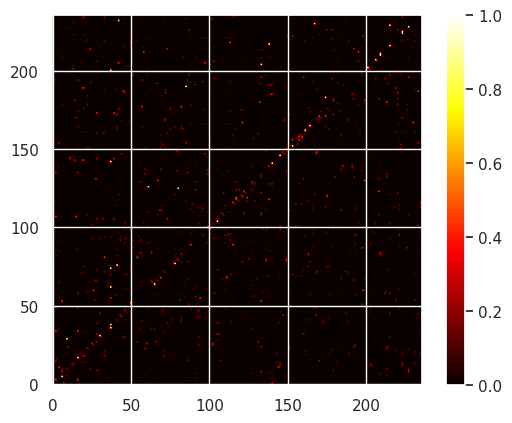

In [82]:
#Mapa de calor
plt.imshow(TransMatrixDF,cmap="hot",origin='lower')
plt.colorbar()

De acuerdo con Abbot et al. las transiciones se hacen a partir de la probabilidad de si se permite o no al caminante regresar o saltar al nodo inicial, esto es:

$$P(X_{n+1}|C="animal",X_n =x_n )=\rho P(X_{n+1}|X_n =l^{-1}["animal])+(1-\rho)P(X_{n+1}|X_n =x_n)$$

Donde $l^{-1} es una funcion que toma una etiqueta y me devuelve el nodo con esa etiqueta.

como de los resultados de Aboot et al. encuentran que los caminantes con salto al inicial dan mayor numero de animales, siendo respuestas mas acertadas, entonces defino que la probabilidad de que exista un salto es de $\rho=0.05$, tal como lo define Abbot et al. "por el momento"


In [83]:
#configuracion del caminante aleatorio, rho=0.05
rho=0.005
P= rho*TransMatrix + (1-rho)*TransMatrix

#P=rho*TransMatrix
#sumafila=np.sum(P,axis=1)
#PN=np.divide(P,sumafila[:,np.newaxis])

Al definier $P$ no hay cambios en la matriz, esto es correcto, pues segun Aboot et al. P debe estar definido por la matriz de transicion, sin embargo esto solo se da cuanto se toma el salto como una binomial.

De aqui, solo queda construir el algoritmo de caminata aleatoria, siguiendo los datos de Abbot et al. $step=2000$, por el moemnto voy a hacer el algoritmo que corra sobre un nodo aleatorio.

In [84]:
def randomWalk(P,pasos):
    nodoinit=np.random.choice(P.shape[0])
    visitado=[]
    for i in range(pasos):
        nodoinit=np.random.choice(P.shape[0],p=P[nodoinit])
        if nodoinit not in visitado:
            visitado.append(nodoinit)
    return visitado

In [85]:
pasos=141
iteaciones=1000

visitedall=[]
for i in range(pasos):
    visited=randomWalk(P,pasos)
    visitedall.append(visited)
DFvisited=pd.DataFrame(visitedall)

In [86]:
#longitud de las listas
media=[]
for i in visitedall:
    longitud=len(i)
    media.append(longitud)
medialongitud=np.mean(media)
medialongitud

66.11347517730496

In [87]:
"""diff=DFvisited.diff()
irt_media=diff.mean()
irt_nonan=irt_media.dropna()
irt=irt_nonan.to_numpy()
irtmedio=irt_nonan.mean()
a=irt_nonan/irtmedio
plt.bar(irt_nonan,a)"""

'diff=DFvisited.diff()\nirt_media=diff.mean()\nirt_nonan=irt_media.dropna()\nirt=irt_nonan.to_numpy()\nirtmedio=irt_nonan.mean()\na=irt_nonan/irtmedio\nplt.bar(irt_nonan,a)'

In [88]:
def random_walk(graph, trans_matrix, start_node):
    current_node = start_node
    visited_nodes = [start_node]
    while len(visited_nodes) < graph.number_of_nodes():
        next_node = np.random.choice(graph.nodes(), p=trans_matrix[current_node])
        if next_node not in visited_nodes:
            visited_nodes.append(next_node)
        current_node = next_node
    return visited_nodes

In [89]:
i=0
rd=[]
while i < 70:
    rf=random_walk(G1,TransMatrix,i)
    rd.append(rf)
    i+=1